In [1]:
dir()

['In',
 'Out',
 '_',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_i',
 '_i1',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'exit',
 'get_ipython',
 'open',
 'quit']

# _Instalação das Bibliotecas_

In [4]:
import pandas as pandas
import matplotlib.pyplot as matplot

In [5]:
dir()

['In',
 'Out',
 '_',
 '_3',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_i',
 '_i1',
 '_i2',
 '_i3',
 '_i4',
 '_i5',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'exit',
 'get_ipython',
 'matplot',
 'open',
 'pandas',
 'quit']

# _1. Leitura e Remoção das linhas duplicadas_

### - Leitura do arquivo usando a biblioteca pandas e remoção das linhas duplicadas dando prioridade da permanência das linhas com dados mais atualizados, logo, classifiquei de acordo com quantidade de instalações, última atualização, reviews e versões mais recentes para manter as mais atualizadas no topo e remover as demais que tinham o mesmo nome logo abaixo.
### - Para ser possível a correta classificação das informações, fiz a conversão de string para valores numéricos e a conversão da data em formato por entexso para númerico usando a biblioteca pandas.

In [42]:
arquivo = pandas.read_csv('googleplaystore.csv')
arquivo['Installs'] = arquivo['Installs'].replace('[\+,]', '', regex=True)
arquivo = arquivo[arquivo['Installs'].str.isnumeric()]
arquivo['Installs'] = pandas.to_numeric(arquivo['Installs'])
arquivo['Last Updated'] = pandas.to_datetime(arquivo['Last Updated'])
arquivo = arquivo[arquivo['Reviews'].str.isnumeric()]
arquivo['Reviews'] = pandas.to_numeric(arquivo['Reviews'])
arquivo_ordenado = arquivo.sort_values(by=['App', 'Installs', 'Last Updated', 'Reviews', 'Current Ver', 'Android Ver'], ascending=False)
arquivo_sem_duplicatas = arquivo_ordenado.drop_duplicates(keep='first', subset=['App'])

print(arquivo_sem_duplicatas)

                                                   App       Category  Rating  \
882   🔥 Football Wallpapers 4K | Full HD Backgrounds 😍  ENTERTAINMENT     4.7   
7559  📏 Smart Ruler ↔️ cm/inch measuring for homework!          TOOLS     4.0   
2575     💘 WhatsLov: Smileys of love, stickers and GIF         SOCIAL     4.6   
4362                                        💎 I'm rich      LIFESTYLE     3.8   
6334                           뽕티비 - 개인방송, 인터넷방송, BJ방송  VIDEO_PLAYERS     NaN   
...                                                ...            ...     ...   
4636                                            /u/app  COMMUNICATION     4.7   
4541                                                .R          TOOLS     4.5   
324                         - Free Comics - Comic Apps         COMICS     3.5   
8532                     +Download 4 Instagram Twitter         SOCIAL     4.5   
8884              "i DT" Fútbol. Todos Somos Técnicos.         SPORTS     NaN   

      Reviews  Size  Instal

# _2. Top 5 Apps mais instalados em gráfico de barras_

### - Fiz a remoção das linhas duplicadas e a conversão de valores repetindo o código anterior e dando prioridade a ordenação pela quantidade de instalações. 
### - Logo depois no terceiro bloco verifiquei o quinto valor da tabela e incluí os Apps que tinham a mesma quantidade de instalações ou mais para ao gráfico. 
### - No último bloco criei a tabela usando a biblioteca matplotlib.pyplot.

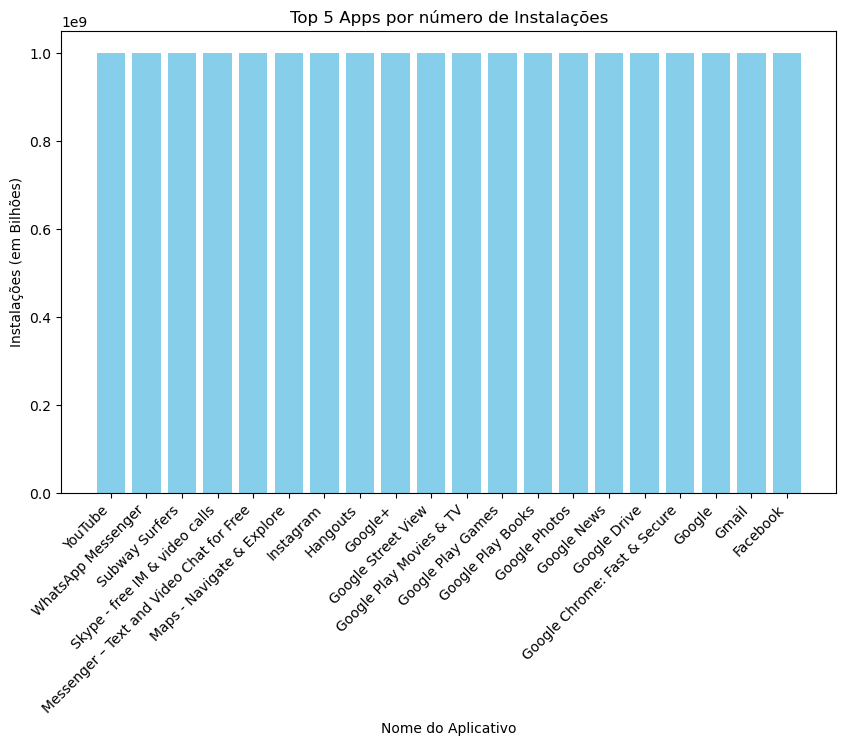

In [6]:
arquivo = pandas.read_csv('googleplaystore.csv')
arquivo['Installs'] = arquivo['Installs'].replace('[\+,]', '', regex=True)
arquivo = arquivo[arquivo['Installs'].str.isnumeric()]
arquivo['Installs'] = pandas.to_numeric(arquivo['Installs'])
arquivo['Last Updated'] = pandas.to_datetime(arquivo['Last Updated'])
arquivo = arquivo[arquivo['Reviews'].str.isnumeric()]
arquivo['Reviews'] = pandas.to_numeric(arquivo['Reviews'])

arquivo_ordenado = arquivo.sort_values(by=['Installs', 'App', 'Last Updated', 'Reviews', 'Current Ver', 'Android Ver'], ascending=False)
arquivo_sem_duplicatas = arquivo_ordenado.drop_duplicates(keep='first', subset=['App'])



quinto_valor = arquivo_sem_duplicatas['Installs'].iloc[4]
top5_installs  = arquivo_sem_duplicatas[arquivo_sem_duplicatas['Installs'] >= quinto_valor]

matplot.figure(figsize=(10, 6))
matplot.bar(top5_installs['App'], top5_installs['Installs'], color='skyblue')
matplot.xlabel('Nome do Aplicativo')
matplot.ylabel('Instalações (em Bilhões)')
matplot.title('Top 5 Apps por número de Instalações')
matplot.xticks(rotation=45, ha='right')
matplot.show()

# _3. Categorias de Apps existentes no dataset e sua frequência representado em gráfico de pizza (pie chart)_

### - Fiz a remoção das linhas duplicadas repetindo o código da primeira questão. 
### - Logo após fiz a contagem da quantidade de vezes que cada categoria aparece na tabela. 
### - Para melhorar a visualização da tabela, no terceiro bloco de código agrupei as categorias que tinha frequência abaixo de 2% no dataset na categoria OUTROS. 
### - No quarto bloco de código fiz a ordenação de acordo com a coluna de contagem da coluna categorias e removi as demais colunas, removi também as linhas duplicas. 
### - No último bloco criei a tabela usando a biblioteca matplotlib.pyplot.

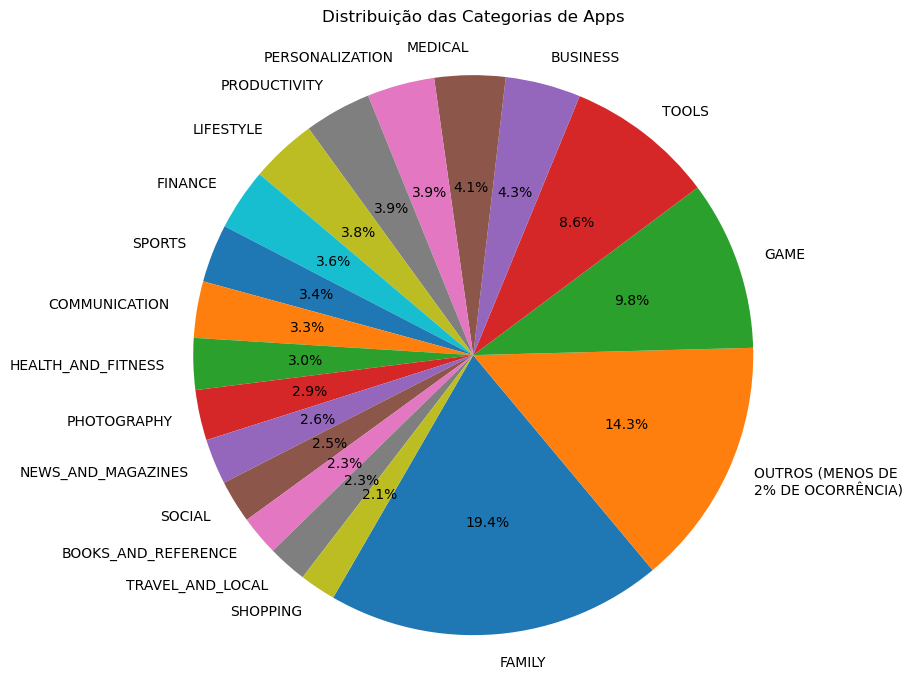

In [20]:
arquivo = pandas.read_csv('googleplaystore.csv')
arquivo['Installs'] = arquivo['Installs'].replace('[\+,]', '', regex=True)
arquivo = arquivo[arquivo['Installs'].str.isnumeric()]
arquivo['Installs'] = pandas.to_numeric(arquivo['Installs'])
arquivo['Last Updated'] = pandas.to_datetime(arquivo['Last Updated'])
arquivo = arquivo[arquivo['Reviews'].str.isnumeric()]
arquivo['Reviews'] = pandas.to_numeric(arquivo['Reviews'])
arquivo_ordenado = arquivo.sort_values(by=['App', 'Installs', 'Last Updated', 'Reviews', 'Current Ver', 'Android Ver'], ascending=False)
arquivo_sem_duplicatas = arquivo_ordenado.drop_duplicates(keep='first', subset=['App']).copy()

contagem = arquivo_sem_duplicatas['Category'].value_counts()
porcentagem = contagem / contagem.sum() * 100
categoria_outros = porcentagem[porcentagem < 2].index

arquivo_sem_duplicatas.loc[arquivo_sem_duplicatas['Category'].isin(categoria_outros), 'Category'] = 'OUTROS (MENOS DE\n2% DE OCORRÊNCIA)'
categorias_contadas = arquivo_sem_duplicatas['Category'].value_counts()
arquivo_sem_duplicatas.loc[:, 'count'] = arquivo_sem_duplicatas['Category'].map(categorias_contadas)

arquivo_ordenado_contagem = arquivo_sem_duplicatas.sort_values(by='count', ascending=False)
arquivo_categorias = arquivo_ordenado_contagem.drop_duplicates(keep='last', subset=['Category'])


categorias = arquivo_categorias['Category']
contagens = arquivo_categorias['count']
matplot.figure(figsize=(10, 8))
matplot.pie(contagens, labels=categorias, autopct='%1.1f%%', startangle=240)
matplot.title('Distribuição das Categorias de Apps\n')
matplot.axis('equal')
matplot.show()

# _4. App mais caro existente no dataset._

### - Fiz a leitura do arquivo e logo após filtrei apenas os Apps pagos, fiz a conversão dos valores da coluna 'Price' para o tipo numérico e removi o sifrão para a conversão ser possível. 
### - Fiz a ordenação de acordo com a coluna 'Price' na ordem decrescente e selecionei o valor do primeiro App, e que fosse apresentado como resultado na saída todos os Apps que tivessem o mesmo valor para caso ocorresse aplicativos com o mesmo valor.

In [9]:
arquivo = pandas.read_csv('googleplaystore.csv')

arquivo = arquivo.query('Type == "Paid"')
arquivo['Price'] = arquivo['Price'].replace('[\$,]', '', regex=True)
arquivo['Price'] = pandas.to_numeric(arquivo['Price'])

arquivo_sem_duplicatas = arquivo.drop_duplicates(keep='last', subset=['App', 'Price'])
arquivo_ordenado = arquivo_sem_duplicatas.sort_values(by='Price', ascending=False)

primeiro_valor = arquivo_ordenado['Price'].iloc[0]
top1_price  = arquivo_ordenado[arquivo_ordenado['Price'] >= primeiro_valor]

colunas_saida = ['App', 'Price']
print(top1_price[colunas_saida])

                           App  Price
4367  I'm Rich - Trump Edition  400.0


# _5. Quantos Apps são classificados como 'Mature 17+'._

### - Fiz a remoção das linhas duplicadas e a conversão de valores repetindo o código da primeira questão, logo após, fiz a contagem da quantidade de vezes que cada classificação aparece na tabela. 
### - No terceiro bloco de código fiz a ordenação de acordo com a coluna de contagem da coluna classificação e removi as linhas duplicas. 
### - No último bloco selecionei apenas as colunas de contagem e classificação, depois de verificar a posição das linhas, apresentei o resultado apenas da quantidade de apps classificados como 'Mature 17+'.

In [40]:
arquivo = pandas.read_csv('googleplaystore.csv')
arquivo['Installs'] = arquivo['Installs'].replace('[\+,]', '', regex=True)
arquivo = arquivo[arquivo['Installs'].str.isnumeric()]
arquivo['Installs'] = pandas.to_numeric(arquivo['Installs'])
arquivo['Last Updated'] = pandas.to_datetime(arquivo['Last Updated'])
arquivo = arquivo[arquivo['Reviews'].str.isnumeric()]
arquivo['Reviews'] = pandas.to_numeric(arquivo['Reviews'])
arquivo_ordenado = arquivo.sort_values(by=['App', 'Installs', 'Last Updated', 'Reviews', 'Current Ver', 'Android Ver'], ascending=False)
arquivo_sem_duplicatas = arquivo_ordenado.drop_duplicates(keep='first', subset=['App'])

contagem = arquivo_sem_duplicatas['Content Rating'].value_counts()
classificacao_contada = pandas.merge(arquivo_sem_duplicatas, contagem, on='Content Rating', how='left')

classificacao_ordenado = classificacao_contada.sort_values(by='count', ascending=False)
arquivo_classificacao = classificacao_ordenado.drop_duplicates(keep='last', subset=['Content Rating'])

colunas_para_salvar = ['Content Rating', 'count']
#print(arquivo_classificacao[colunas_para_salvar])
resultado = arquivo_classificacao[colunas_para_salvar].iloc[2].values[1]
print(f"{resultado} apps são classificados como 'Mature 17+'")

393 apps são classificados como 'Mature 17+'


# _6. Top 10 Apps com mais reviews_

### - Fiz a remoção das linhas duplicadas e a conversão de valores repetindo o código da primeira questão.
### - Fiz a ordenação de acordo com a coluna 'Reviews' na ordem decrescente e selecionei o valor do décimo App, e que fosse apresentado como resultado na saída todos os Apps que tivessem a mesma quantidade de Reviews para caso ocorresse aplicativos com o mesmo valor.

In [11]:
arquivo = pandas.read_csv('googleplaystore.csv')
arquivo['Installs'] = arquivo['Installs'].replace('[\+,]', '', regex=True)
arquivo = arquivo[arquivo['Installs'].str.isnumeric()]
arquivo['Installs'] = pandas.to_numeric(arquivo['Installs'])
arquivo['Last Updated'] = pandas.to_datetime(arquivo['Last Updated'])
arquivo = arquivo[arquivo['Reviews'].str.isnumeric()]
arquivo['Reviews'] = pandas.to_numeric(arquivo['Reviews'])
arquivo_ordenado = arquivo.sort_values(by=['App', 'Installs', 'Last Updated', 'Reviews', 'Current Ver', 'Android Ver'], ascending=False)
arquivo_sem_duplicatas = arquivo_ordenado.drop_duplicates(keep='first', subset=['App'])

arquivo_ordenado_reviews = arquivo_sem_duplicatas.sort_values(by='Reviews', ascending=False)

decimo_valor = arquivo_ordenado_reviews['Reviews'].iloc[9]
top10_reviews  = arquivo_ordenado_reviews[arquivo_ordenado_reviews['Reviews'] >= decimo_valor]

colunas_para_salvar = ['App', 'Reviews']
print(top10_reviews[colunas_para_salvar])

                                                    App   Reviews
2544                                           Facebook  78158306
336                                  WhatsApp Messenger  69119316
2604                                          Instagram  66577446
382            Messenger – Text and Video Chat for Free  56646578
1879                                     Clash of Clans  44893888
4005            Clean Master- Space Cleaner & Antivirus  42916526
1872                                     Subway Surfers  27725352
3665                                            YouTube  25655305
7536  Security Master - Antivirus, VPN, AppLock, Boo...  24900999
1878                                       Clash Royale  23136735


# _7. Cáculos sobre o dataset

### A) Top 20 Apps mais bem avaliados

#### - Fiz a remoção das linhas duplicadas e a conversão de valores repetindo o código da primeira questão.
#### - Fiz a ordenação de acordo com a coluna 'Rating', e para desempate usei a coluna 'Reviews' e depois a coluna 'Installs', todas em ordem decrescente. 
#### - Dessa forma mesmo que um aplicativo tenha a mesma avaliação, os que tiverem mais quantidades de avaliações e instalações serão considerados melhores avaliados por terem tido um melhor feedback e maior alcance. 

In [13]:
arquivo = pandas.read_csv('googleplaystore.csv')
arquivo['Installs'] = arquivo['Installs'].replace('[\+,]', '', regex=True)
arquivo = arquivo[arquivo['Installs'].str.isnumeric()]
arquivo['Installs'] = pandas.to_numeric(arquivo['Installs'])
arquivo['Last Updated'] = pandas.to_datetime(arquivo['Last Updated'])
arquivo = arquivo[arquivo['Reviews'].str.isnumeric()]
arquivo['Reviews'] = pandas.to_numeric(arquivo['Reviews'])
arquivo_ordenado = arquivo.sort_values(by=['App', 'Installs', 'Last Updated', 'Reviews', 'Current Ver', 'Android Ver'], ascending=False)
arquivo_sem_duplicatas = arquivo_ordenado.drop_duplicates(keep='first', subset=['App'])

arquivo_ordenado2 = arquivo_sem_duplicatas.sort_values(by=['Rating', 'Reviews', 'Installs'], ascending=False)

colunas = ['App', 'Reviews', 'Installs', 'Rating']
print(arquivo_ordenado2.head(20)[colunas])

                                                     App  Reviews  Installs  \
10357                                         Ríos de Fe      141      1000   
10301  FD Calculator (EMI, SIP, RD & Loan Eligilibility)      104      1000   
8058                                          Oración CX      103      5000   
6823                      Barisal University App-BU Face      100      1000   
9496                                          Master E.K       90      1000   
7506                                             CL REPL       47      1000   
5230                                              AJ Cam       44       100   
7842                         CS & IT Interview Questions       43      1000   
9517                                             Ek Vote       43       500   
5196    AI Today : Artificial Intelligence News & AI 101       43       100   
5852                              Quran Khmer Offline AY       41      1000   
10564                                     FK Dedinje

### B) Categoria de Apps Pagos mais rentável de acordo com sua média por App (Receita Média por App por Categoria) em uma faixa de preço específica

#### - Fiz a remoção das linhas duplicadas e a conversão de valores repetindo o código da primeira questão. e acrescentei uma filtagrem para manter apenas os Apps pagos e transformei os dados da coluna 'Price' em um tipo númerico.
#### - Em seguida fiz uma filtragem com valores especificos.
#### - Fiz o agrupamento das linhas que tinham os dados das colunas categoria e preço iguais e somei a quantidade de instalações de cada linha agrupada, fiz a contagem de linhas em cada grupo e adicionei as informações a tabela principal nomeando a coluna como Qtd Apps.
#### - Logo após multipliquei a quantidade de inslações pelo preço do app e fiz um agrupamento de acordo com a categoria, somando as colunas Qtd Apps e a coluna com o resultado da multiplicação anterior (Receita Total). E fiz a criação de mais uma coluna apartir da divisão dos valores da coluna Receita Total pela coluna Qtd Apps, formando a coluna Receita por App.
#### - Fiz a ordenação da tabela gerada pela coluna Receita por App e para desempate usei a coluna Receita Total, as duas em ordem decrescente, mostrando assim a categoria de Apps com a maior receita por app de acordo com a faixa de preço escolhida.
#### - No último bloco, formatei as colunas com números em casa decimais e filtrei a a categoria de Apps com a maior receita por app e fiz a saída do resultado.

In [46]:
arquivo = pandas.read_csv('googleplaystore.csv')
arquivo['Installs'] = arquivo['Installs'].replace('[\+,]', '', regex=True)
arquivo = arquivo[arquivo['Installs'].str.isnumeric()]
arquivo['Installs'] = pandas.to_numeric(arquivo['Installs'])
arquivo['Last Updated'] = pandas.to_datetime(arquivo['Last Updated'])
arquivo = arquivo[arquivo['Reviews'].str.isnumeric()]
arquivo['Reviews'] = pandas.to_numeric(arquivo['Reviews'])

arquivo = arquivo.query('Type == "Paid"')
arquivo['Price'] = arquivo['Price'].replace('[\$,]', '', regex=True)
arquivo['Price'] = pandas.to_numeric(arquivo['Price'])

arquivo_ordenado = arquivo.sort_values(by=['App', 'Installs', 'Last Updated', 'Reviews', 'Current Ver', 'Android Ver'], ascending=False)
arquivo_sem_duplicatas = arquivo_ordenado.drop_duplicates(keep='first', subset=['App'])

menor_valor = 5
maior_valor = 10
filtro_arquivo = arquivo_sem_duplicatas[(arquivo_sem_duplicatas['Price'] >= menor_valor) & (arquivo_sem_duplicatas['Price'] <= maior_valor)]

soma_installs = filtro_arquivo.groupby(['Category', 'Price'])['Installs'].sum().reset_index(name='Total Installs')
contagem_categoria_preco = filtro_arquivo.groupby(['Category', 'Price']).size().reset_index(name='Qtd Apps')
resultado_contagem = pandas.merge(soma_installs, contagem_categoria_preco, on=['Category', 'Price'])

resultado_contagem['Receita Total'] = resultado_contagem['Total Installs'] * resultado_contagem['Price']
resultado_agrupado = resultado_contagem.groupby('Category').agg({'Receita Total': 'sum', 'Qtd Apps': 'sum'}).reset_index()
resultado_agrupado['Receita por App'] = resultado_agrupado['Receita Total'] / resultado_agrupado['Qtd Apps']

resultado_agrupado_ordenado = resultado_agrupado.sort_values(by=['Receita por App', 'Receita Total'], ascending=False)

resultado_agrupado_ordenado['Receita Total'] = resultado_agrupado_ordenado['Receita Total'].map('${:,.2f}'.format)
resultado_agrupado_ordenado['Receita por App'] = resultado_agrupado_ordenado['Receita por App'].map('${:,.2f}'.format)
colunas = ['Category', 'Receita Total', 'Qtd Apps', 'Receita por App']
receita_por_app = resultado_agrupado_ordenado[colunas].iloc[0].values[3]
nome_categoria = resultado_agrupado_ordenado[colunas].iloc[0].values[0]
print(f"{nome_categoria} é a categoria com a maior média de vendas entre os \
\nApps pagos listados que custam entre {menor_valor} e {maior_valor} dolares.")
print(f"O valor médio de receita por App dessa categoria é igual à {receita_por_app}")

FAMILY é a categoria com a maior média de vendas entre os 
Apps pagos listados que custam entre 5 e 10 dolares.
O valor médio de receita por App dessa categoria é igual à $6,758,530.82


# _8. Formas gráficas de exibição_

### A) Gráfico de dispersão para a Receita Média por App por Categoria

#### - Usei a tabela gerada no último script , apenas comentei a saída e criei o gráfico de dispersão usando a biblioteca matplotlib.pyplot apresentando as categorias e a receita média por app em cada categoria.

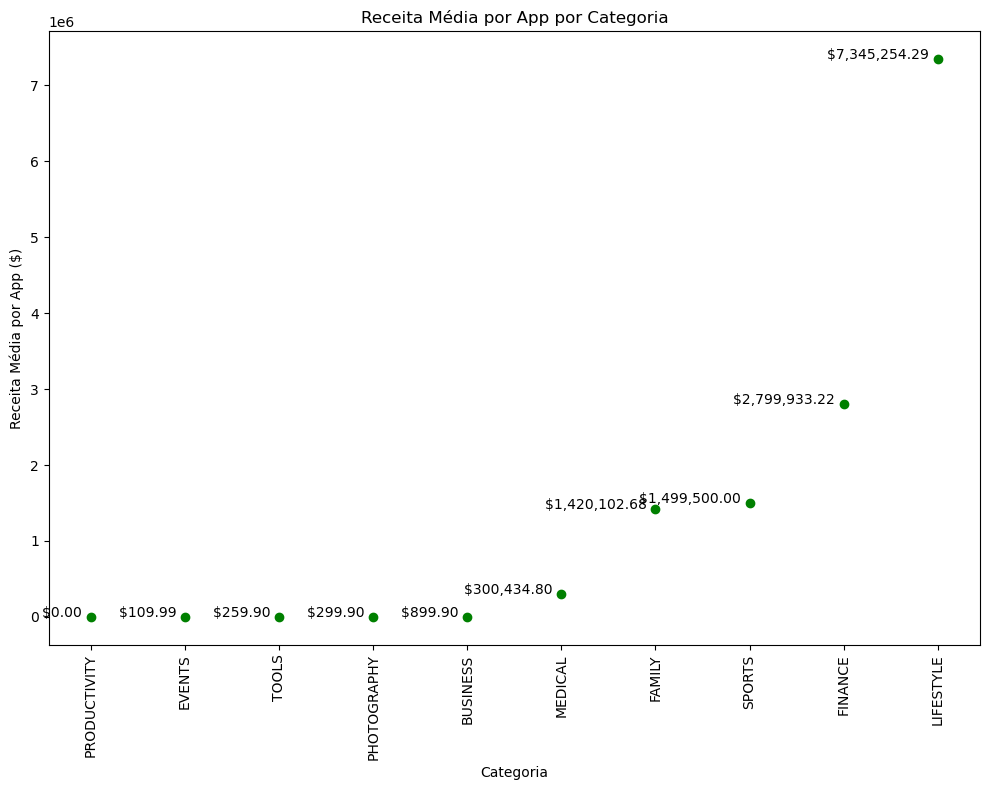

In [48]:
arquivo = pandas.read_csv('googleplaystore.csv')
arquivo['Installs'] = arquivo['Installs'].replace('[\+,]', '', regex=True)
arquivo = arquivo[arquivo['Installs'].str.isnumeric()]
arquivo['Installs'] = pandas.to_numeric(arquivo['Installs'])
arquivo['Last Updated'] = pandas.to_datetime(arquivo['Last Updated'])
arquivo = arquivo[arquivo['Reviews'].str.isnumeric()]
arquivo['Reviews'] = pandas.to_numeric(arquivo['Reviews'])

arquivo = arquivo.query('Type == "Paid"')
arquivo['Price'] = arquivo['Price'].replace('[\$,]', '', regex=True)
arquivo['Price'] = pandas.to_numeric(arquivo['Price'])

arquivo_ordenado = arquivo.sort_values(by=['App', 'Installs', 'Last Updated', 'Reviews', 'Current Ver', 'Android Ver'], ascending=False)
arquivo_sem_duplicatas = arquivo_ordenado.drop_duplicates(keep='first', subset=['App'])

menor_valor = 20
maior_valor = 400
filtro_arquivo = arquivo_sem_duplicatas[(arquivo_sem_duplicatas['Price'] >= menor_valor) & (arquivo_sem_duplicatas['Price'] <= maior_valor)]

soma_installs = filtro_arquivo.groupby(['Category', 'Price'])['Installs'].sum().reset_index(name='Total Installs')
contagem_categoria_preco = filtro_arquivo.groupby(['Category', 'Price']).size().reset_index(name='Qtd Apps')
resultado_contagem = pandas.merge(soma_installs, contagem_categoria_preco, on=['Category', 'Price'])

resultado_contagem['Receita Total'] = resultado_contagem['Total Installs'] * resultado_contagem['Price']
resultado_agrupado = resultado_contagem.groupby('Category').agg({'Receita Total': 'sum', 'Qtd Apps': 'sum'}).reset_index()
resultado_agrupado['Receita por App'] = resultado_agrupado['Receita Total'] / resultado_agrupado['Qtd Apps']

resultado_agrupado_ordenado = resultado_agrupado.sort_values(by=['Receita por App', 'Receita Total'], ascending=True)

resultado_agrupado_ordenado['Receita Total'] = resultado_agrupado_ordenado['Receita Total'].map('${:,.2f}'.format)
resultado_agrupado_ordenado['Receita por App'] = resultado_agrupado_ordenado['Receita por App'].map('${:,.2f}'.format)
resultado_agrupado_ordenado['Receita por App'] = resultado_agrupado_ordenado['Receita por App'].replace('[\$,]', '', regex=True)
resultado_agrupado_ordenado['Receita por App'] = pandas.to_numeric(resultado_agrupado_ordenado['Receita por App'])
#colunas = ['Category', 'Receita Total', 'Qtd Apps', 'Receita por App']
#print(resultado_agrupado_ordenado[colunas])
#receita_por_app = resultado_agrupado_ordenado[colunas].iloc[0].values[3]
#nome_categoria = resultado_agrupado_ordenado[colunas].iloc[0].values[0]
#print(f"{nome_categoria} é a categoria com a maior média de vendas entre os \
#\nApps pagos listados que custam entre {menor_valor} e {maior_valor} dolares.")
#print(f"O valor médio de receita por App dessa categoria é igual à {receita_por_app}")


fig, ax = matplot.subplots(figsize=(10, 8))

ax.scatter(resultado_agrupado_ordenado['Category'], resultado_agrupado_ordenado['Receita por App'], color='green')
ax.set_title('Receita Média por App por Categoria')
ax.set_xlabel('Categoria')
ax.set_ylabel('Receita Média por App ($)')
ax.tick_params(axis='x', rotation=90)

for i in range(len(resultado_agrupado_ordenado)):
    receita_por_app = resultado_agrupado_ordenado['Receita por App'].iloc[i]
    ax.text(resultado_agrupado_ordenado['Category'].iloc[i], receita_por_app, f"${receita_por_app:,.2f}  ", ha='right')

matplot.tight_layout()
matplot.show()
matplot.show()

### _B) Top 10 Apps com mais reviews_

#### - Reutilizei o código da questão 6 e comentei a saída. Gerei um gráfico de linhas com o nome dos Apps e a quantidade de reviews em dezenas de milhões e seus valores especificos em cada ponto no gráfico.

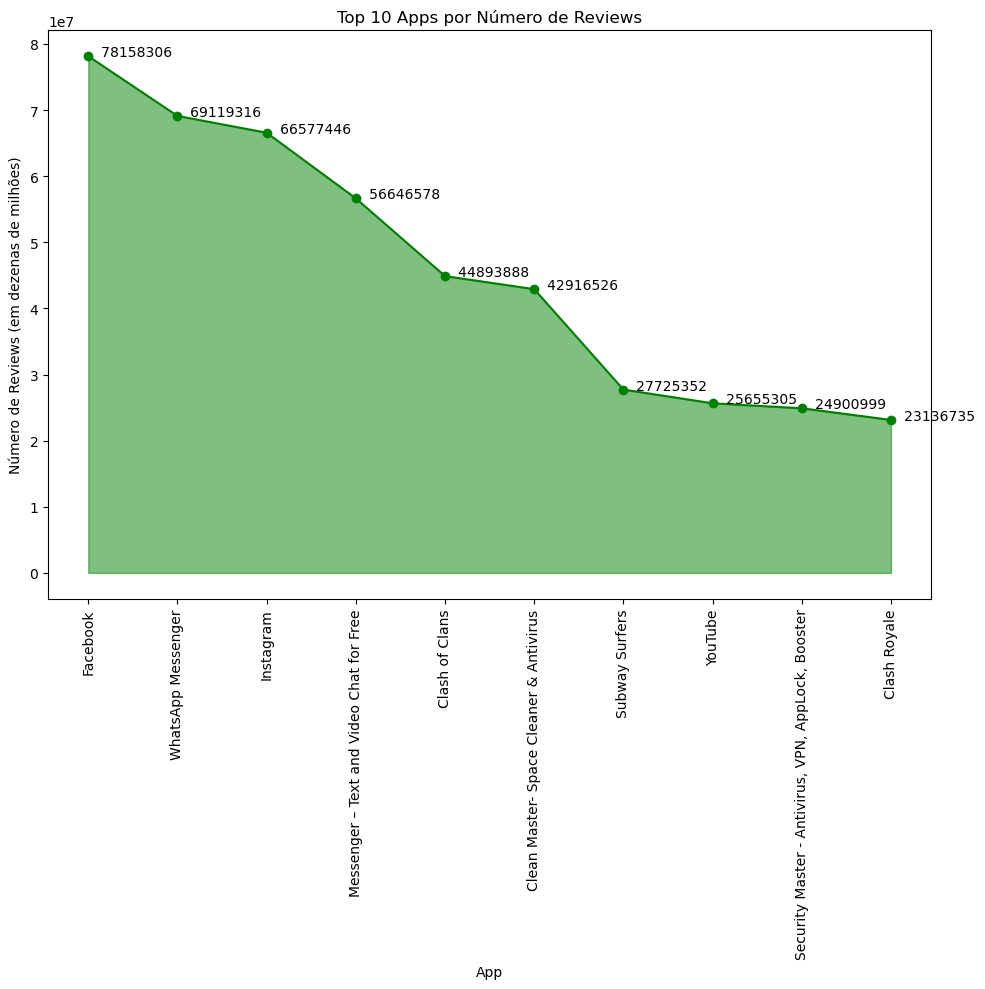

In [190]:
arquivo = pandas.read_csv('googleplaystore.csv')
arquivo['Installs'] = arquivo['Installs'].replace('[\+,]', '', regex=True)
arquivo = arquivo[arquivo['Installs'].str.isnumeric()]
arquivo['Installs'] = pandas.to_numeric(arquivo['Installs'])
arquivo['Last Updated'] = pandas.to_datetime(arquivo['Last Updated'])
arquivo = arquivo[arquivo['Reviews'].str.isnumeric()]
arquivo['Reviews'] = pandas.to_numeric(arquivo['Reviews'])
arquivo_ordenado = arquivo.sort_values(by=['App', 'Installs', 'Last Updated', 'Reviews', 'Current Ver', 'Android Ver'], ascending=False)
arquivo_sem_duplicatas = arquivo_ordenado.drop_duplicates(keep='first', subset=['App'])

arquivo_ordenado_reviews = arquivo_sem_duplicatas.sort_values(by='Reviews', ascending=False)

#colunas_para_salvar = ['App', 'Reviews']
top_10_reviews = arquivo_ordenado_reviews.head(10)
#print(top_10_reviews[colunas_para_salvar])


fig, ax = matplot.subplots(figsize=(10, 10))

ax.fill_between(top_10_reviews['App'], top_10_reviews['Reviews'], color='green', alpha=0.5)
ax.plot(top_10_reviews['App'], top_10_reviews['Reviews'], marker='o', color='green')
ax.set_title('Top 10 Apps por Número de Reviews')
ax.set_xlabel('App')
ax.set_ylabel('Número de Reviews (em dezenas de milhões)')
ax.tick_params(axis='x', rotation=90)

for i in range(len(top_10_reviews)):
    receita_por_app = top_10_reviews['Reviews'].iloc[i]
    ax.text(top_10_reviews['App'].iloc[i], receita_por_app, f"   {receita_por_app:}", ha='left')

matplot.xticks(rotation=90)
matplot.tight_layout()
matplot.show()